In [144]:
import pandas as pd 

In [145]:
## Read csv and data filter
data = pd.read_csv("sports.csv")
print(data)
data["2R"] *= 0.01
data["M"] *= 1e-3
print(data)

       Sport    2R      M  U_max  U_inf        Re    CD  R_Omega  FD_Mg  FL_Mg
0  Badminton   6.0    5.0  137.0    6.7   30000.0  0.64    0.019  420.0    0.1
1     Soccer  21.0  450.0   51.0   30.0  500000.0  0.24    9.100    2.9    2.3
       Sport    2R      M  U_max  U_inf        Re    CD  R_Omega  FD_Mg  FL_Mg
0  Badminton  0.06  0.005  137.0    6.7   30000.0  0.64    0.019  420.0    0.1
1     Soccer  0.21  0.450   51.0   30.0  500000.0  0.24    9.100    2.9    2.3


In [146]:
import numpy as np 
import numpy.linalg as npl 

Delta_t = 0.0002

def experiment(u_, v_, w_, ball_, x0, Omega_):
    ## total time, Delta_t, time, x
    t_total = 5
    t = np.arange(0, t_total, Delta_t)
    x = np.zeros([3, t.shape[0] + 1])

    ## initialize which kind of ball, x_0, u_0, Omega_0, v_0 and w_0
    u_0 = u_
    v_0 = v_
    w_0 = w_

    x[:, 0] = x0

    Omega = Omega_

    def which_ball(sport):
        this_sport = data[data['Sport'] == sport]
        R = this_sport["2R"] / 2
        M = this_sport["M"]
        rho = 1.3
        C_d = this_sport["CD"]
        return tuple([float(x) for x in [R, M, rho, C_d]])

    R, M, rho, C_d = which_ball(ball_)
    C_Omega = 1.7
    u = np.array([[u_0], [v_0], [w_0]])

    # print("u = ", u)
    # print("M =", M, ", R = ", R)
    # print("rho = ", rho)
    # print("C_d = ", C_d)
    is_flying = True

    for i,_ in enumerate(t):
        if not is_flying:
            x[:, i + 1] = x[:, i]
            continue 
        
        ### cauculate F_D F_L G(= mg)
        F_d = - 0.5 * rho * npl.norm(u) * u * np.pi * R ** 2 * C_d 
        F_l = rho * R ** 3 * np.cross(Omega.T, u.T) * C_Omega
        F_d = F_d.flatten()
        F_l = F_l.flatten()
        G = M * np.array([0, 0, -9.8])

        ### calculate F_total, a and Delta v
        F_total = F_d + F_l + G
        a = F_total / M 
        a = a.reshape([3, 1])
 
        ### calculate u, x
        x[:, i + 1] = x[:, i] + u.flatten() * Delta_t + 0.5 * a.flatten() * Delta_t ** 2
        u = u + a * Delta_t 
        if x[2, i + 1] <= 0:
            is_flying = False
    return x, t

In [147]:
def badmin(u_norm, u_direction_): 
    u_direction = u_direction_ / 180 * np.pi

    u_0 = u_norm * np.cos(u_direction)
    v_0 = 0
    w_0 = u_norm * np.sin(u_direction)
    return u_0, v_0, w_0 

x0 = np.array([0, 0, 2])
Omega = np.array([[np.pi], [np.pi], [np.pi]])

u, v, w = badmin(80, 40)
x, t = experiment(u, v, w, "Badminton", x0, Omega)
u2, v2, w2 = badmin(80, 0)
x2, t2 = experiment(u2, v2, w2, "Badminton", x0, Omega)
x3 = np.array([4, 0, 1])
u3, v3, w3 = badmin(10, 27)
x3, t3 = experiment(u3, v3, w3, "Badminton", x3, Omega)

(25000,)
(25000,)
(25000,)


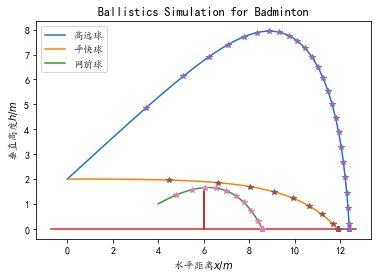

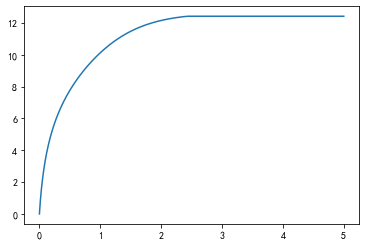

In [148]:
## visualize
import matplotlib.pyplot as plt 

### 中文字体
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']

plt.plot(x[0, :], x[2, :])
# plt.xlim([-1, 13])
plt.plot(x2[0, :], x2[2, :])
plt.plot(x3[0, :], x3[2, :])

def some_times(x, t):
    interval = 0.1 // Delta_t
    print(t.shape)
    end = t.shape[0] // interval 
    slice = [int(x) for x in np.arange(interval, end * interval, interval)]
    return x[:, slice], t[slice]

plt.plot([-0.7, 6, 6, 6, 12.7], [0, 0, 1.55, 0, 0])

some_x, _ = some_times(x, t)
plt.plot(some_x[0, :], some_x[2, :], '*')
some_x2, _ = some_times(x2, t)
plt.plot(some_x2[0, :], some_x2[2, :], '*')
some_x3, _ = some_times(x3, t)
plt.plot(some_x3[0, :], some_x3[2, :], '*')


plt.xlabel(r"水平距离$x/m$")
plt.ylabel(r"垂直高度$h/m$")
plt.title("Ballistics Simulation for Badminton")
plt.legend(["高远球","平快球", "网前球"])
plt.show()

plt.plot(t, x[0, :-1])
plt.show()

(25000,)


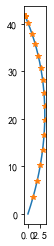

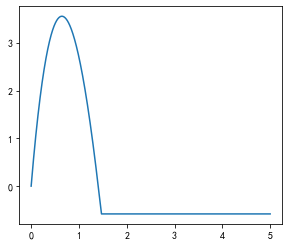

In [149]:
x0 = np.array([0, 0, 0])
Omega = np.array([0 * np.pi, 0 * np.pi, 88])
xs, ts = experiment(12, 36, 8, "Soccer", x0, Omega)
plt.plot(xs[0, :], xs[1, :])

some_xs, _ = some_times(xs, ts)
plt.plot(some_xs[0, :], some_xs[1, :], '*')

plt.axis('scaled')

plt.show()

plt.plot(t, xs[0, :-1])
plt.axis('scaled')
plt.show()